# Titanic dataset

importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

test=pd.read_csv('tested.csv')
test.head()
train=pd.read_csv('train.csv')
train.head()

In [7]:
train["train_test"]=1
test["train_test"]=0
test["survived"]=np.NaN
all_data=pd.concat([train,test])
all_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'survived'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


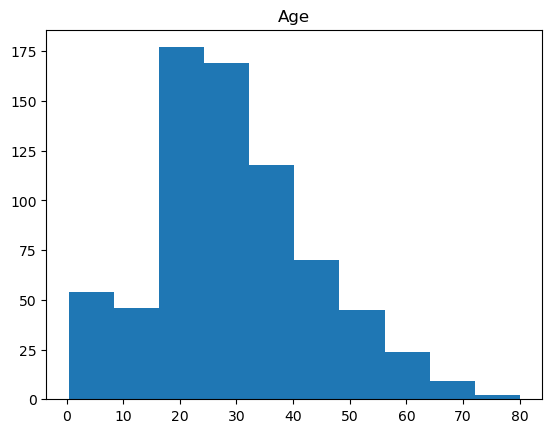

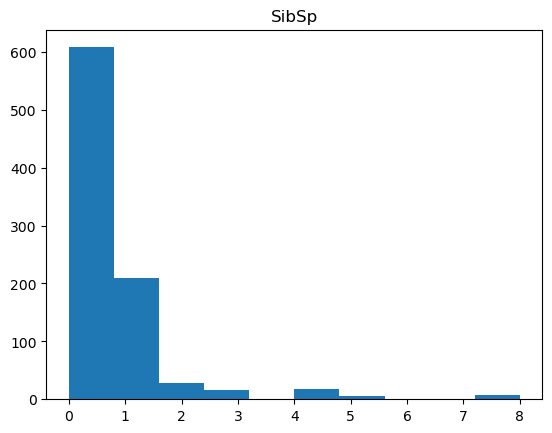

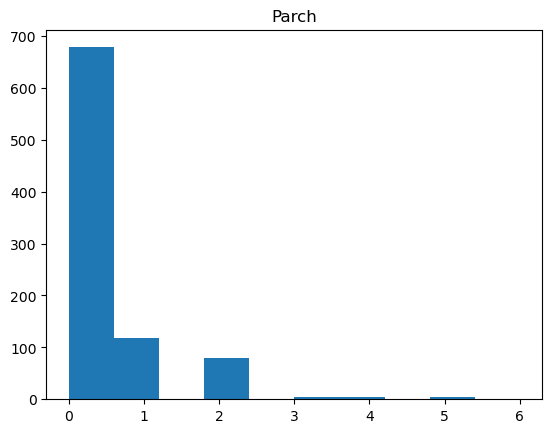

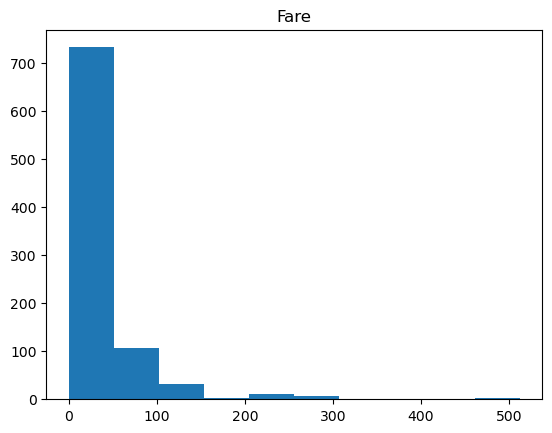

In [17]:
#seperate the data intonumeric and categorical
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

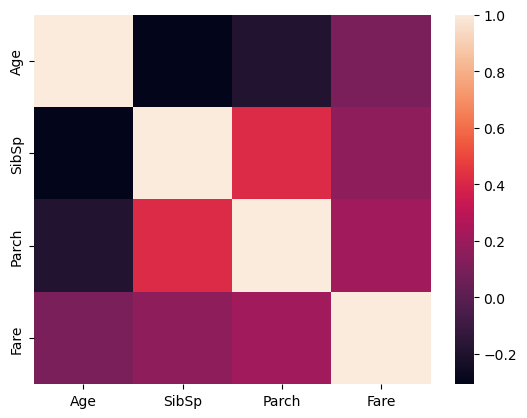

In [16]:
sns.heatmap(df_num.corr())

In [19]:
pd.pivot_table(train,index="Survived",values=['Age','SibSp','Parch','Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



AttributeError: 'AxesSubplot' object has no attribute 'set_titl'

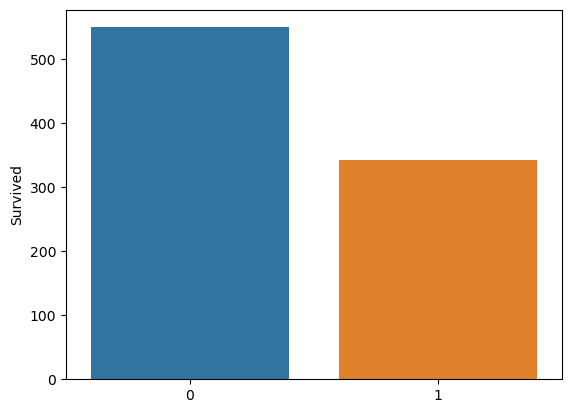

In [22]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_titl(i)
    plt.show()
                                                                                 

In [24]:
print(pd.pivot_table(train,index='Survived',columns='Pclass',values='Ticket',aggfunc='count'))
print()
print(pd.pivot_table(train,index='Survived',columns='Sex',values='Ticket',aggfunc='count'))
print()
print(pd.pivot_table(train,index='Survived',columns='Embarked',values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [28]:
df_cat.Cabin
train['Cabin_multiple']=train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['Cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_multiple, dtype: int64

In [30]:
pd.pivot_table(train,index='Survived',columns='Cabin_multiple',values='Ticket',aggfunc='count')

Cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [33]:
train['Cabin_adv']=train.Cabin.apply(lambda x:str(x)[0])
print(train.Cabin_adv.value_counts())
pd.pivot_table(train,index='Survived',columns='Cabin_adv',values='Name',aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_adv, dtype: int64


Cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [34]:
train['numeric_ticket']=train.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
train['ticket_letters']=train.Ticket.apply(lambda x:''.join(x.split('')[:-1]).replace('.','').replace('/','').lower()if len(x.split('')[:-1]))

SyntaxError: invalid syntax (1289519501.py, line 2)

#model deployment
#logistic reg
#K Nearest neighbour
#Support vector classifier

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [47]:
#logistic reg
lr=LogisticRegression(max_iter=2000)
cv=cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

NameError: name 'X_train_scaled' is not defined

In [2]:
knn=KNeighborsClassifier()
cv=cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

NameError: name 'KNeighborsClassifier' is not defined

In [1]:
svc=SVC(probability=True)
cv=cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

NameError: name 'SVC' is not defined